In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Est-ce qu'un ANN peut apprendre à dire si un eleve a son bac ou pas


## Créeation d'un dataset d'élèves, de notes et leur résultat au bac

In [2]:
n_matieres = 4
n_eleves = 200
note_maxi = 20
X = np.random.randint(note_maxi + 1,
                      size = (n_matieres,
                            n_eleves))
X.shape

(4, 200)

In [3]:
coeffs = np.array([2, 4, 2, 6])
print(coeffs.shape)
coeffs = coeffs.reshape(4, 1)

scores_bac = np.dot(X.T, coeffs)

moyennes = scores_bac/np.sum(coeffs)

Y = (moyennes >=10)*1

Y.shape


(4,)


(200, 1)

## Architecture du RNN

In [4]:
def init_parametres(dimensions):
    
    params = {}
    
    n_layers = len(dimensions) - 1
    
    for i in range(1, n_layers + 1):
        params["W" + str(i)] = np.random.randn(dimensions[i-1], dimensions[i]) / np.sqrt(dimensions[i])
        params["b" + str(i)] = np.zeros((1, dimensions[i])) 
    
    return params
    
   

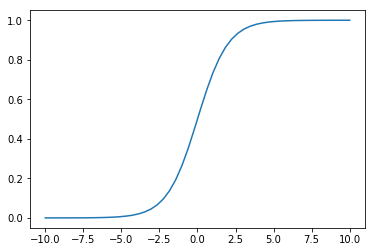

In [5]:
def sigmoid(z):
    S = 1/(1+ np.exp(-z))
    return S

ligne = np.linspace(-10,10)
plt.plot(ligne, sigmoid(ligne))

In [6]:
def forward_pass(X, parametres):
    """La forward pass calcule les activations
    
    X: dataset
    parametres: les poids et les biais
    
    return A3: la derniere activation de notre réseau de neurones 
    return cache :  stocke les résultats intermediaires
    """
    #dans cette fonction on veur également retourner les resultats des aclculs intermediares qui sont mis en cache
    
    cache = {}
    cache["A0"] = X.T

    #On recupere le nombre de couches,L
    L = int(len(parametres)/2)

    #Pour chaque couche en partant de la derniere
    for i in range(1, L+1):
        W = parametres["W" + str(i)] 
        b = parametres[f"b{i}"]
        #calcul de la preactivation
        cache["Z" + str(i)] = np.dot(cache["A" + str(i-1)], W) + b
        #calcul de l'activation
        cache["A" + str(i)] = sigmoid(cache["Z" + str(i)])
        
    #return A3, cache
    return cache["A" + str(L)], cache

In [23]:
def compute_cost(A, Y):
    #pour calculer la cost j'ai besoin du nombre d'exemples: n_eleves, de la prediction:A3, du label Y
    Loss = np.log(A) * Y + (1-Y) * np.log(1-A)
    cost = -np.sum(Loss) / n_eleves
    
    return cost
print(compute_cost)

print(compute_cost(Y*0.0000001 + 0.5, Y))

<function compute_cost at 0x7f0ee029a1e0>
0.6931470875599547


In [12]:
def backward(parametres, cache,Y,m):
    # Dans cette fonction on veut retourner les dérivées de l'erreur par rapport à chaque paramètre
    grads = {}
    
    # On récupère le nombre de couches, L
    L = int(len(parametres) / 2)

    # Pour chaque couche, en partant de la dernière
    for i in reversed(range(1, L + 1)):
        # Calcul de dZ
        if i == L:
            dZ = cache["A"+str(L)] - Y
        else:
            dZ = np.dot(dZ, 
                        parametres["W"+str(i + 1)].T) 
            A = cache["A"+str(i)]
            dZ = dZ * (A * (1 - A))

        # Calcul dW
        grads["dW"+str(i)] = np.dot(cache["A"+str(i-1)].T, dZ) / m
        
        # Calcul db
        grads["db"+str(i)] = np.sum(dZ, axis = 0, keepdims = True)/m
    
    return grads

### Update parametres backward

In [13]:
def update_parametres(params,grads, learning_rate = 1.2):

    L = int(len(params)/2)
    
    for i in range(1, L+1):
            
        
        #on applique un learning rate pour une mise à jour des parametres
        params["W" + str(i)] = params["W" + str(i)]-learning_rate * grads["dW" + str(i)]
        params["b" + str(i)] = params["b" + str(i)]-learning_rate* grads["db" + str(i)]
    
    return params

## Test Reseau de neurones

In [30]:
def rnn_model(X, Y,dimensions,num_iteration = 10000, learning_rate =0.05):
    
    parametres = init_parametres(dimensions)
     # Pour trouver les meilleurs parametres possibles, 
    for i in range(0, num_iteration):
        
        # Pour Calculer l'activation de la dernière couche
        A, cache = forward_pass(X, parametres)
        
        # Calcul de l'erreur commises par le réseau
        cost = compute_cost(A, Y)
        
        # Obtenir les dérivées de l'erreur par rapport aux paramètres du réseau (les poids et les biais)
        grads = backward(parametres, 
                         cache,
                         Y,
                         n_eleves)
        
        # Obtenir de nouveaux parametres W et b qui sont sensés être légérment meilleures
        parametres = update_parametres(parametres , grads, learning_rate=learning_rate)
        
        # afficher la cost tous les 1000 itérations
        if i % 1000 == 0:
            print(i, cost)
         
    #
    return parametres
        

(200, 1)

In [31]:
parametres2 = rnn_model(X, Y, 
                        dimensions=[X.shape[0],3,3,1],
                        num_iteration = 30000, learning_rate=0.05)

0 0.735500911655495
1000 0.6199596015403417
2000 0.5470210529828057
3000 0.4566827276719414
4000 0.39762131693463404
5000 0.3485344236196022
6000 0.302681293843533
7000 0.26151410052086715
8000 0.2284991681411293
9000 0.20427799696317694
10000 0.18747387366984541
11000 0.17571304066524632
12000 0.1676381290666136
13000 0.16364381851853885
14000 0.1737078144001577
15000 0.19829658239202302
16000 0.19306863124813922
17000 0.18480893244629887
18000 0.17677812651628863
19000 0.16928128771332243
20000 0.16240322003651766
21000 0.14765632198588435
22000 0.12637903556207186
23000 0.10603535974987997
24000 0.0962307435193327
25000 0.09028870141347685
26000 0.08646284856219597
27000 0.08364850150515464
28000 0.08140660748474193
29000 0.07954063489306826
